# Explore AIMed Dataset


### AIMed dataset preprocessing

 - Download from ftp://ftp.cs.utexas.edu/pub/mooney/bio-data/interactions.tar.gz"

 - Convert the raw dataset into XML for using instructions in http://mars.cs.utu.fi/PPICorpora/ 
 
 ```python
 convert_aimed.py -i  aimed_interactions_input_dir -o aimed.xml
 ```

Acknowledgements:
 Pyysalo S, Airola A, Heimonen J, Björne J, Ginter F, Salakoski T, Comparative Analysis of Five Protein-protein Interaction Corpora, LBM'07. 2007.


In [1]:
xmlfile = "aimed.xml"

In [2]:
import sys
sys.path.append('./source')

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

#### Covert to pandas

In [4]:
from datatransformer.AimedXmlToDataFramePreprocessed import AimedXmlToDataFramePreprocessed
df = AimedXmlToDataFramePreprocessed()(xmlfile)


In [5]:
df.query("docid=='AIMed.d35'")

,docid,isValid,passage,passageid
696,AIMed.d35,False,Most familial early-onset Alzheimer's disease cases are caused by mutations in the PROTEIN1 ( PROTEIN2 ) gene.,AIMed.d35.s292
697,AIMed.d35,False,"Although numerous studies revealed predominant localization of PROTEIN1 to endoplasmic reticulum and Golgi, there are conflicting reports on the localization of PROTEIN2 to the cell surface.",AIMed.d35.s294
698,AIMed.d35,True,"Cell surface PROTEIN1 formed complexes in vivo with actin-binding protein PROTEIN ( PROTEIN2 ), which is known to form bridges between cell surface receptors and cytoskeleton and mediate cell adhesion and cell motility.",AIMed.d35.s299
699,AIMed.d35,True,"Cell surface PROTEIN1 formed complexes in vivo with actin-binding protein PROTEIN2 ( PROTEIN ), which is known to form bridges between cell surface receptors and cytoskeleton and mediate cell adhesion and cell motility.",AIMed.d35.s299
700,AIMed.d35,False,"Cell surface PROTEIN formed complexes in vivo with actin-binding protein PROTEIN1 ( PROTEIN2 ), which is known to form bridges between cell surface receptors and cytoskeleton and mediate cell adhesion and cell motility.",AIMed.d35.s299


In [6]:
df.shape

(5834, 4)

In [7]:
df.head(n=2)

,docid,isValid,passage,passageid
0,AIMed.d0,False,"Cytokines measurements during PROTEIN1 treatment showed a trend to decreasing levels of PROTEIN2 at 4, 12, and 24 weeks.",AIMed.d0.s5
1,AIMed.d0,False,Levels of PROTEIN1 were slightly increased following PROTEIN2 treatment (P = 0.09).,AIMed.d0.s6


In [8]:
unique_passages = df["passage"].unique()
unique_sentence_count=[ len(r.split("\n")) for r in unique_passages]
print("Unique setences :  " , sum(unique_sentence_count))

Unique setences :   5829


### Explore dataset

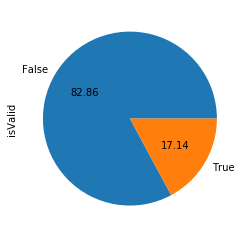

In [9]:
import matplotlib.pyplot as plt

df["isValid"].value_counts().plot.pie(autopct='%.2f',figsize=(4, 4))
plt.show()

In [10]:
df["isValid"].value_counts()

False    4834
True     1000
Name: isValid, dtype: int64

In [11]:
df.to_json("AIMedFull_preprocessed.json")

## Split into train/test/validation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

unique_docids = df.docid.unique()
stratified =  [ df.query("docid == '{}'".format(p))['isValid'].iloc[0] for p in unique_docids]
traindocid, valdocid = train_test_split(unique_docids,  test_size=.1,
                                                        random_state=777, stratify=stratified)

In [13]:
train = df[df['docid'].isin(traindocid)]
val = df[df['docid'].isin(valdocid)]




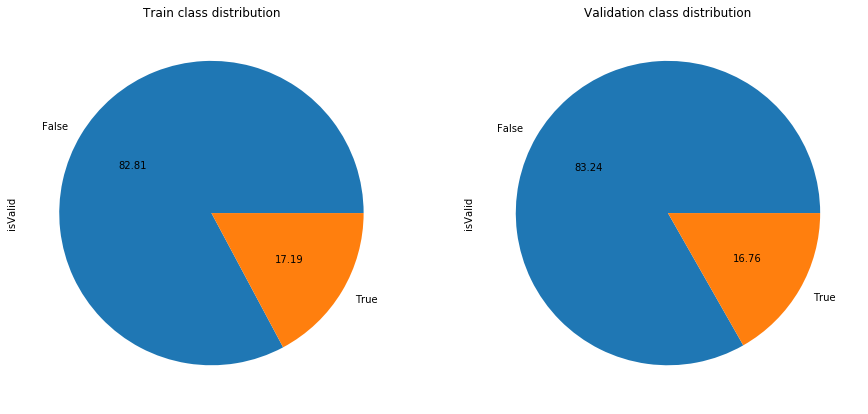

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,20))

ax[0].set_title('Train class distribution')
train.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[0])

ax[1].set_title('Validation class distribution')
val.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[1])



plt.show()

In [15]:
train.to_json("AIMedtrain_preprocessed.json")
val.to_json("AIMedval_preprocessed.json")

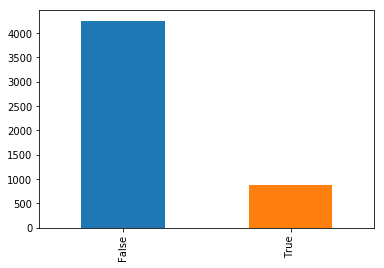

In [16]:
train.isValid.value_counts().plot.bar()

In [17]:
word_count= train.apply(lambda r: len(r["passage"].split(" ")), axis=1)

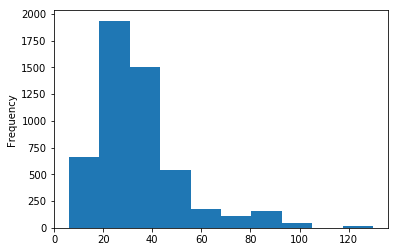

In [18]:
word_count.plot.hist()

In [19]:
train.sample(n=20).to_json("Aimedsample.json")

## Split into train/validation without looking at pubmed overlap

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


train_p, val_p = train_test_split(df,  test_size=.1,
                                                        random_state=777, stratify=df["isValid"])

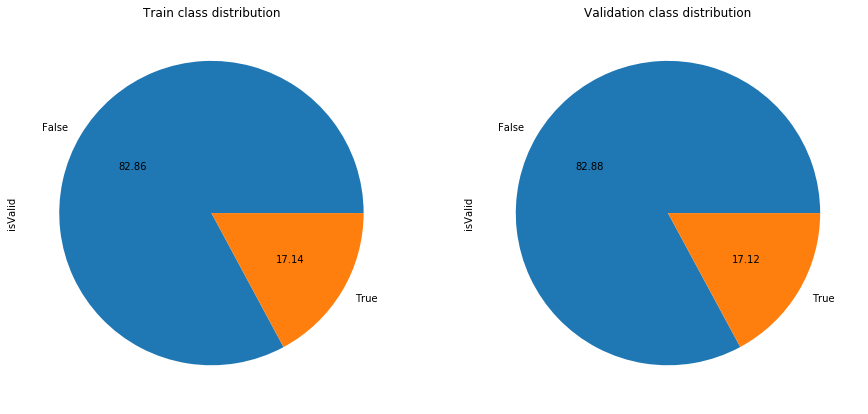

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,20))

ax[0].set_title('Train class distribution')
train_p.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[0])

ax[1].set_title('Validation class distribution')
val_p.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[1])



plt.show()

In [22]:
train_p.to_json("AIMedtrain_pubmedoverlap_preprocessed.json")
val_p.to_json("AIMedval_pubmedoverlap_preprocessed.json")

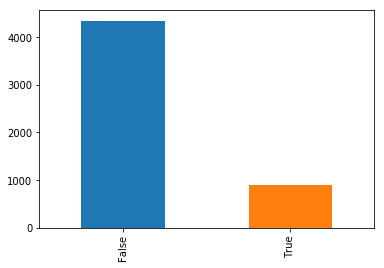

In [23]:
train_p.isValid.value_counts().plot.bar()